In [1]:
! pip install pandas


In [2]:
import pandas as pd
df=pd.read_csv("residential_energy_consumption_unclean.csv")
df

,timestamp,household_id,num_occupants,house_size_sqft,num_appliances,outside_temp_celsius,heating_type,cooling_type,energy_consumption_kwh,monthly_income,...,smart_meter_installed,weekday,is_weekend,water_heater_type,washing_machine_usage_per_week,internet_connected_devices,avg_daily_usage_hours,notes,occupant_names,manual_override
0,2021-01-31,1787,NaN,2922.0,16,NaN,Gas,NaN,22.73,163860.0,...,1,Sunday,1,electric,5,5,16.8,unknown,NaN,N
1,30/12/2021,1263,4.0,571.0,24,24.9,Gas,NaN,10.47,157142.0,...,1,Thursday,0,gas,10,17,9.9,NaN,"John, Mary",NaN
2,2020-05-10,1057,NaN,573.0,10,3.7,Electrc,Fan,57.88,192595.0,...,1,Sunday,1,gas,0,7,23.6,NaN,Unknown,NaN
3,2021-07-18,1301,NaN,2420.0,5,4.6,Electrc,NaN,17.64,NaN,...,1,Sunday,1,gas,10,17,17.8,,NaN,NaN
4,04/02/2021,1030,NaN,1864.0,7,33.1,NaN,NaN,9.99,78503.0,...,0,Thursday,0,gas,9,1,5.2,peak hours,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-01-06,1963,5.0,663.0,5,-0.9,NaN,NaN,29.63,NaN,...,1,Sunday,1,solar,12,10,22.6,normal usage,"John, Mary",NaN
9996,2020-10-10,1582,5.0,NaN,23,0.6,NaN,NaN,34.29,165021.0,...,1,Saturday,1,electric,6,18,13.6,,NaN,N
9997,02/05/2020,1648,4.0,NaN,10,30.8,Gas,Fan,84.50,52635.0,...,1,Saturday,1,gas,0,17,17.4,NaN,Ali;Sara,NaN
9998,2022-01-11,1143,1.0,2525.0,15,16.8,NaN,Fan,3.17,173460.0,...,1,Tuesday,0,solar,4,6,11.1,NaN,Ali;Sara,Yes


In [3]:
print("Dataset Shape",df.shape)

Dataset Shape (10000, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       10000 non-null  object 
 1   household_id                    10000 non-null  int64  
 2   num_occupants                   9000 non-null   float64
 3   house_size_sqft                 9000 non-null   float64
 4   num_appliances                  10000 non-null  int64  
 5   outside_temp_celsius            9000 non-null   float64
 6   heating_type                    6725 non-null   object 
 7   cooling_type                    6716 non-null   object 
 8   energy_consumption_kwh          10000 non-null  float64
 9   monthly_income                  9000 non-null   float64
 10  has_solar_panels                10000 non-null  int64  
 11  smart_meter_installed           10000 non-null  int64  
 12  weekday                         1

In [5]:
print(df.describe())

       household_id  num_occupants  house_size_sqft  num_appliances  \
count  10000.000000    9000.000000      9000.000000    10000.000000   
mean    1502.988700       3.477111      2272.082778       14.554600   
std      288.633837       1.711017      1008.414402        5.717192   
min     1000.000000       1.000000       500.000000        5.000000   
25%     1254.750000       2.000000      1404.750000       10.000000   
50%     1509.000000       3.000000      2287.500000       15.000000   
75%     1755.000000       5.000000      3140.000000       20.000000   
max     1999.000000       6.000000      3999.000000       24.000000   

       outside_temp_celsius  energy_consumption_kwh  monthly_income  \
count           9000.000000            10000.000000     9000.000000   
mean              14.997244               29.822833   109871.144222   
std                9.987101               14.867459    51428.190817   
min              -26.900000              -25.120000    20055.000000   
25%  

In [6]:
duplicate=df.duplicated().sum()
print(f"Number of duplicate values : {duplicate}")

Number of duplicate values : 0


In [7]:
null_values=df.isnull().sum()
print(f"null values : \n{null_values}")

null values : 
timestamp                            0
household_id                         0
num_occupants                     1000
house_size_sqft                   1000
num_appliances                       0
outside_temp_celsius              1000
heating_type                      3275
cooling_type                      3284
energy_consumption_kwh               0
monthly_income                    1000
has_solar_panels                     0
smart_meter_installed                0
weekday                              0
is_weekend                           0
water_heater_type                    0
washing_machine_usage_per_week       0
internet_connected_devices           0
avg_daily_usage_hours                0
notes                             2879
occupant_names                    4262
manual_override                   3341
dtype: int64


In [8]:
! pip install missingno

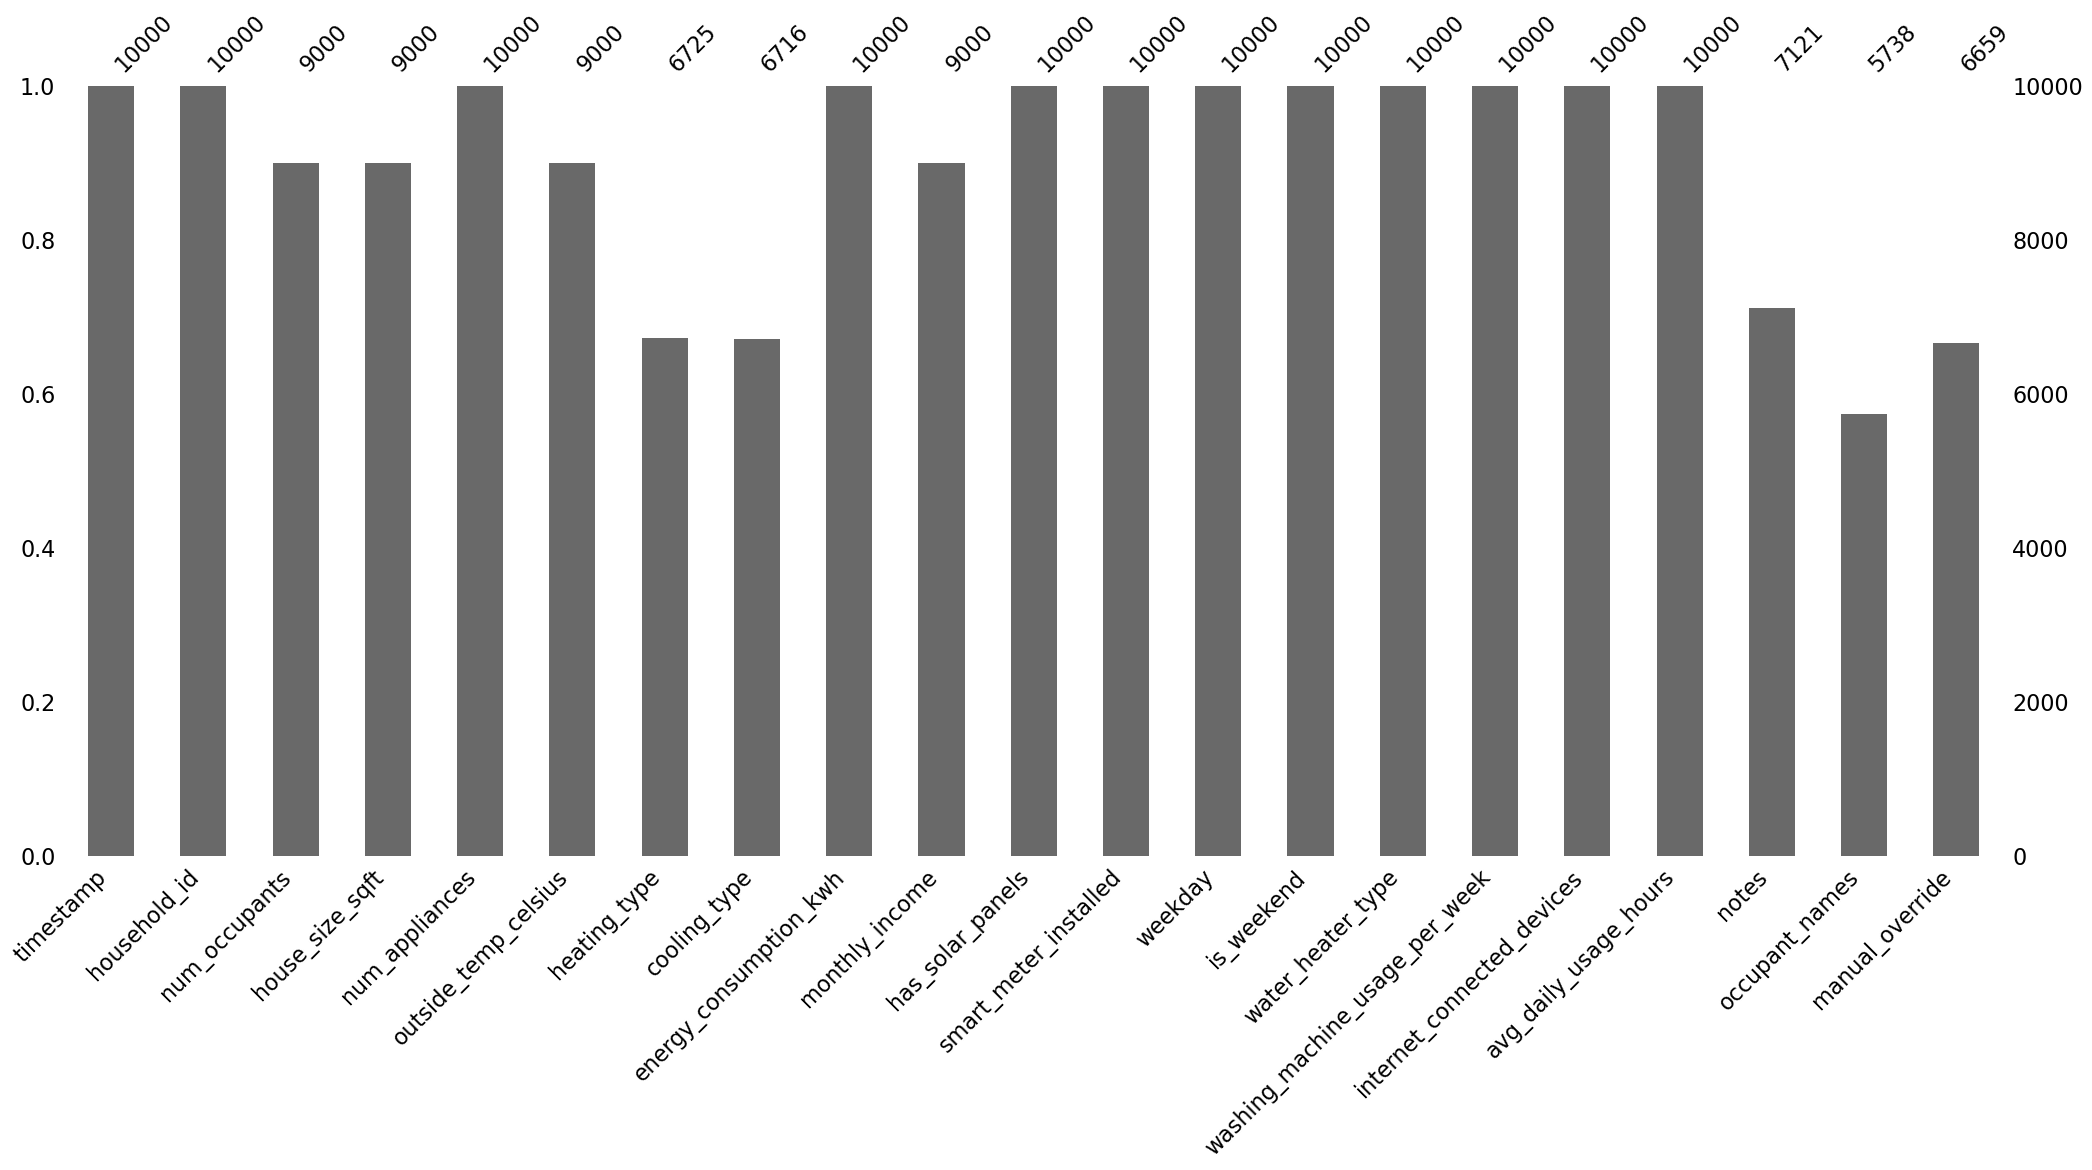

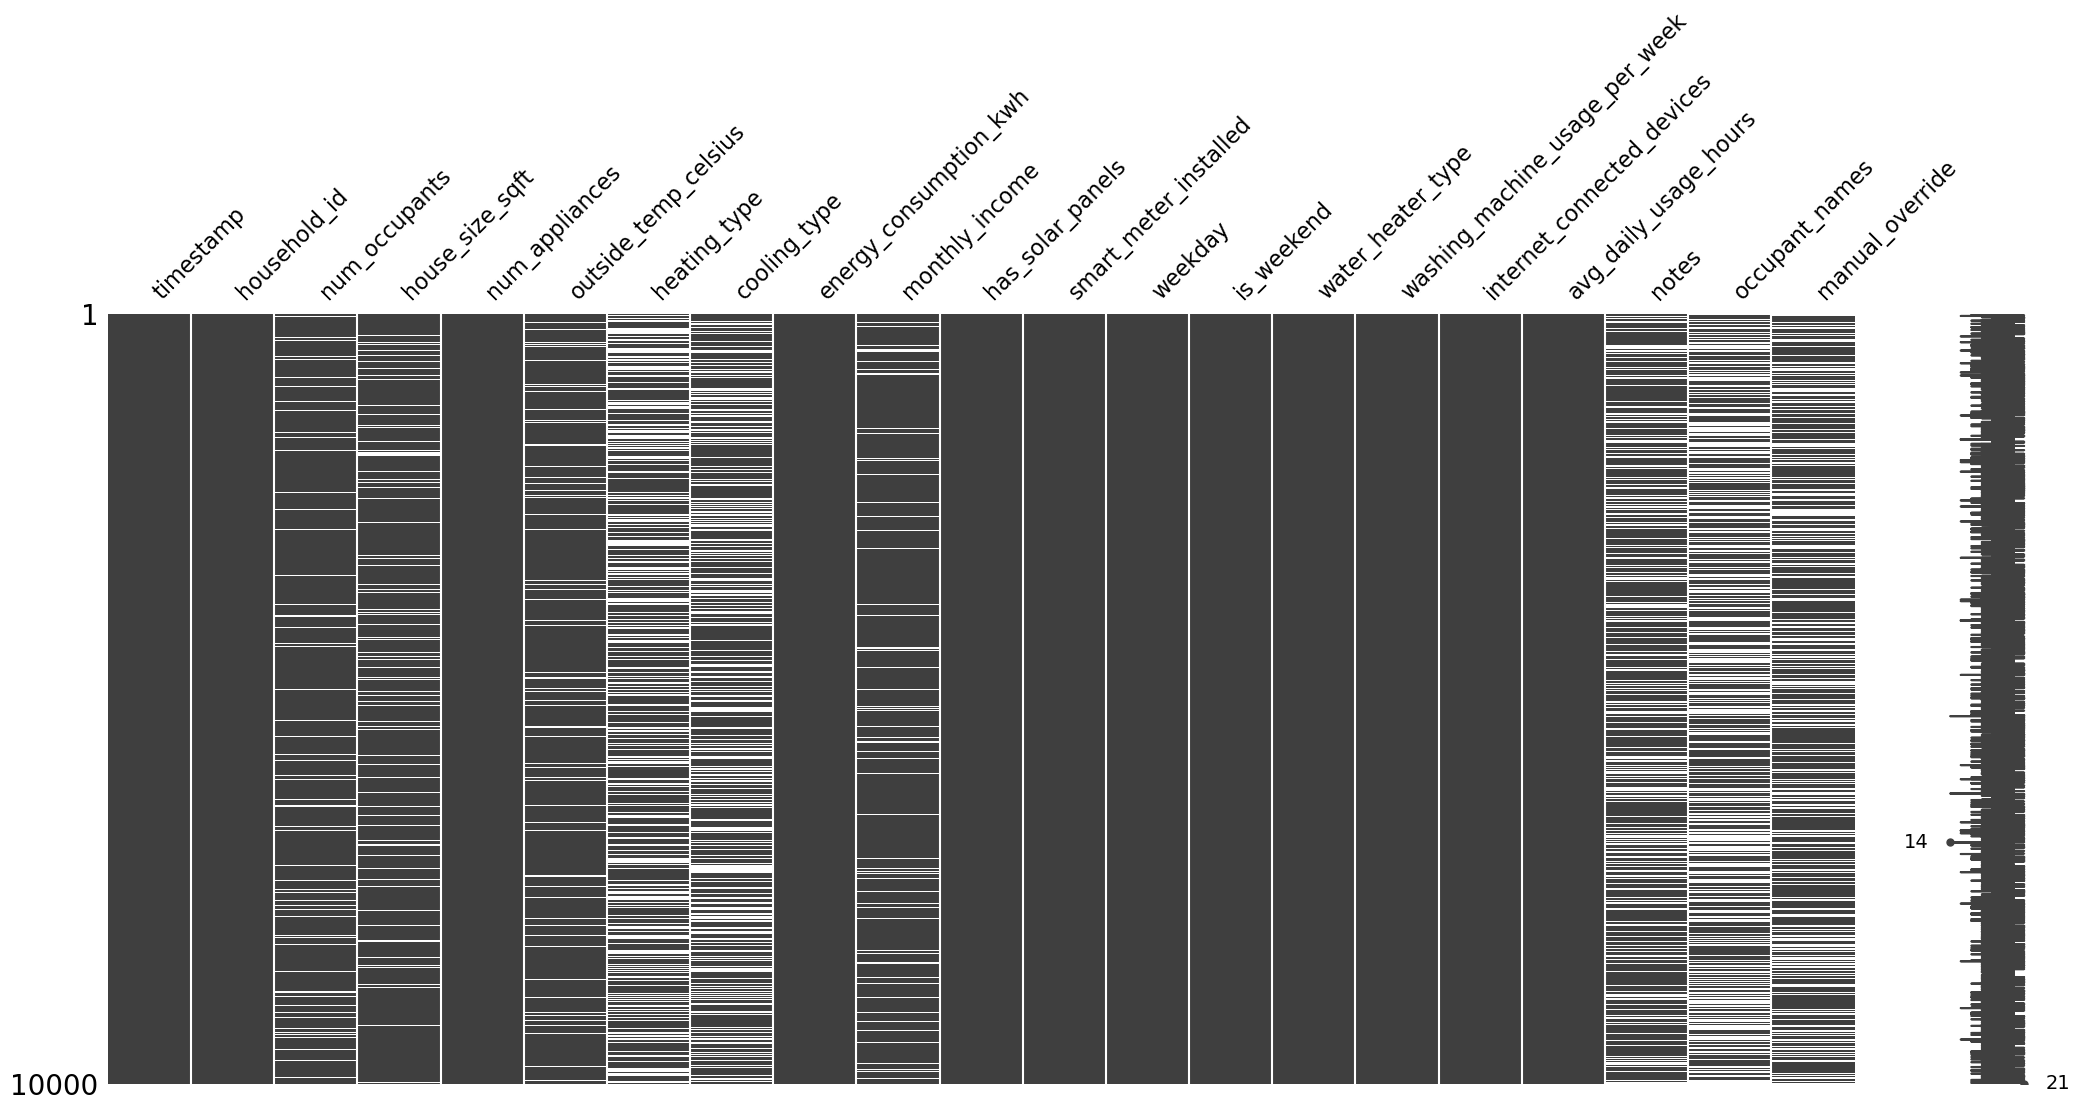

In [9]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()


In [10]:
null_percent = (df.isnull().sum() / len(df)) * 100
print(f"Null values (%):\n{null_percent}")


Null values (%):
timestamp                          0.00
household_id                       0.00
num_occupants                     10.00
house_size_sqft                   10.00
num_appliances                     0.00
outside_temp_celsius              10.00
heating_type                      32.75
cooling_type                      32.84
energy_consumption_kwh             0.00
monthly_income                    10.00
has_solar_panels                   0.00
smart_meter_installed              0.00
weekday                            0.00
is_weekend                         0.00
water_heater_type                  0.00
washing_machine_usage_per_week     0.00
internet_connected_devices         0.00
avg_daily_usage_hours              0.00
notes                             28.79
occupant_names                    42.62
manual_override                   33.41
dtype: float64


In [11]:
df.drop(columns=["notes", "occupant_names"], inplace=True)


In [12]:
# numerical values
df["num_occupants"].fillna(df["num_occupants"].median(),inplace=True)
df["house_size_sqft"].fillna(df["house_size_sqft"].median(),inplace=True)
df["outside_temp_celsius"].fillna(df["outside_temp_celsius"].mean(),inplace=True)
df["monthly_income"].fillna(df["monthly_income"].median(),inplace=True)

#categorical values
df["heating_type"].fillna("unknown",inplace=True)
df["cooling_type"].fillna("unknown",inplace=True)
df["manual_override"].fillna("unknown",inplace=True)


C:\Users\linga\AppData\Local\Temp\ipykernel_9080\2892920232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num_occupants"].fillna(df["num_occupants"].median(),inplace=True)
C:\Users\linga\AppData\Local\Temp\ipykernel_9080\2892920232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

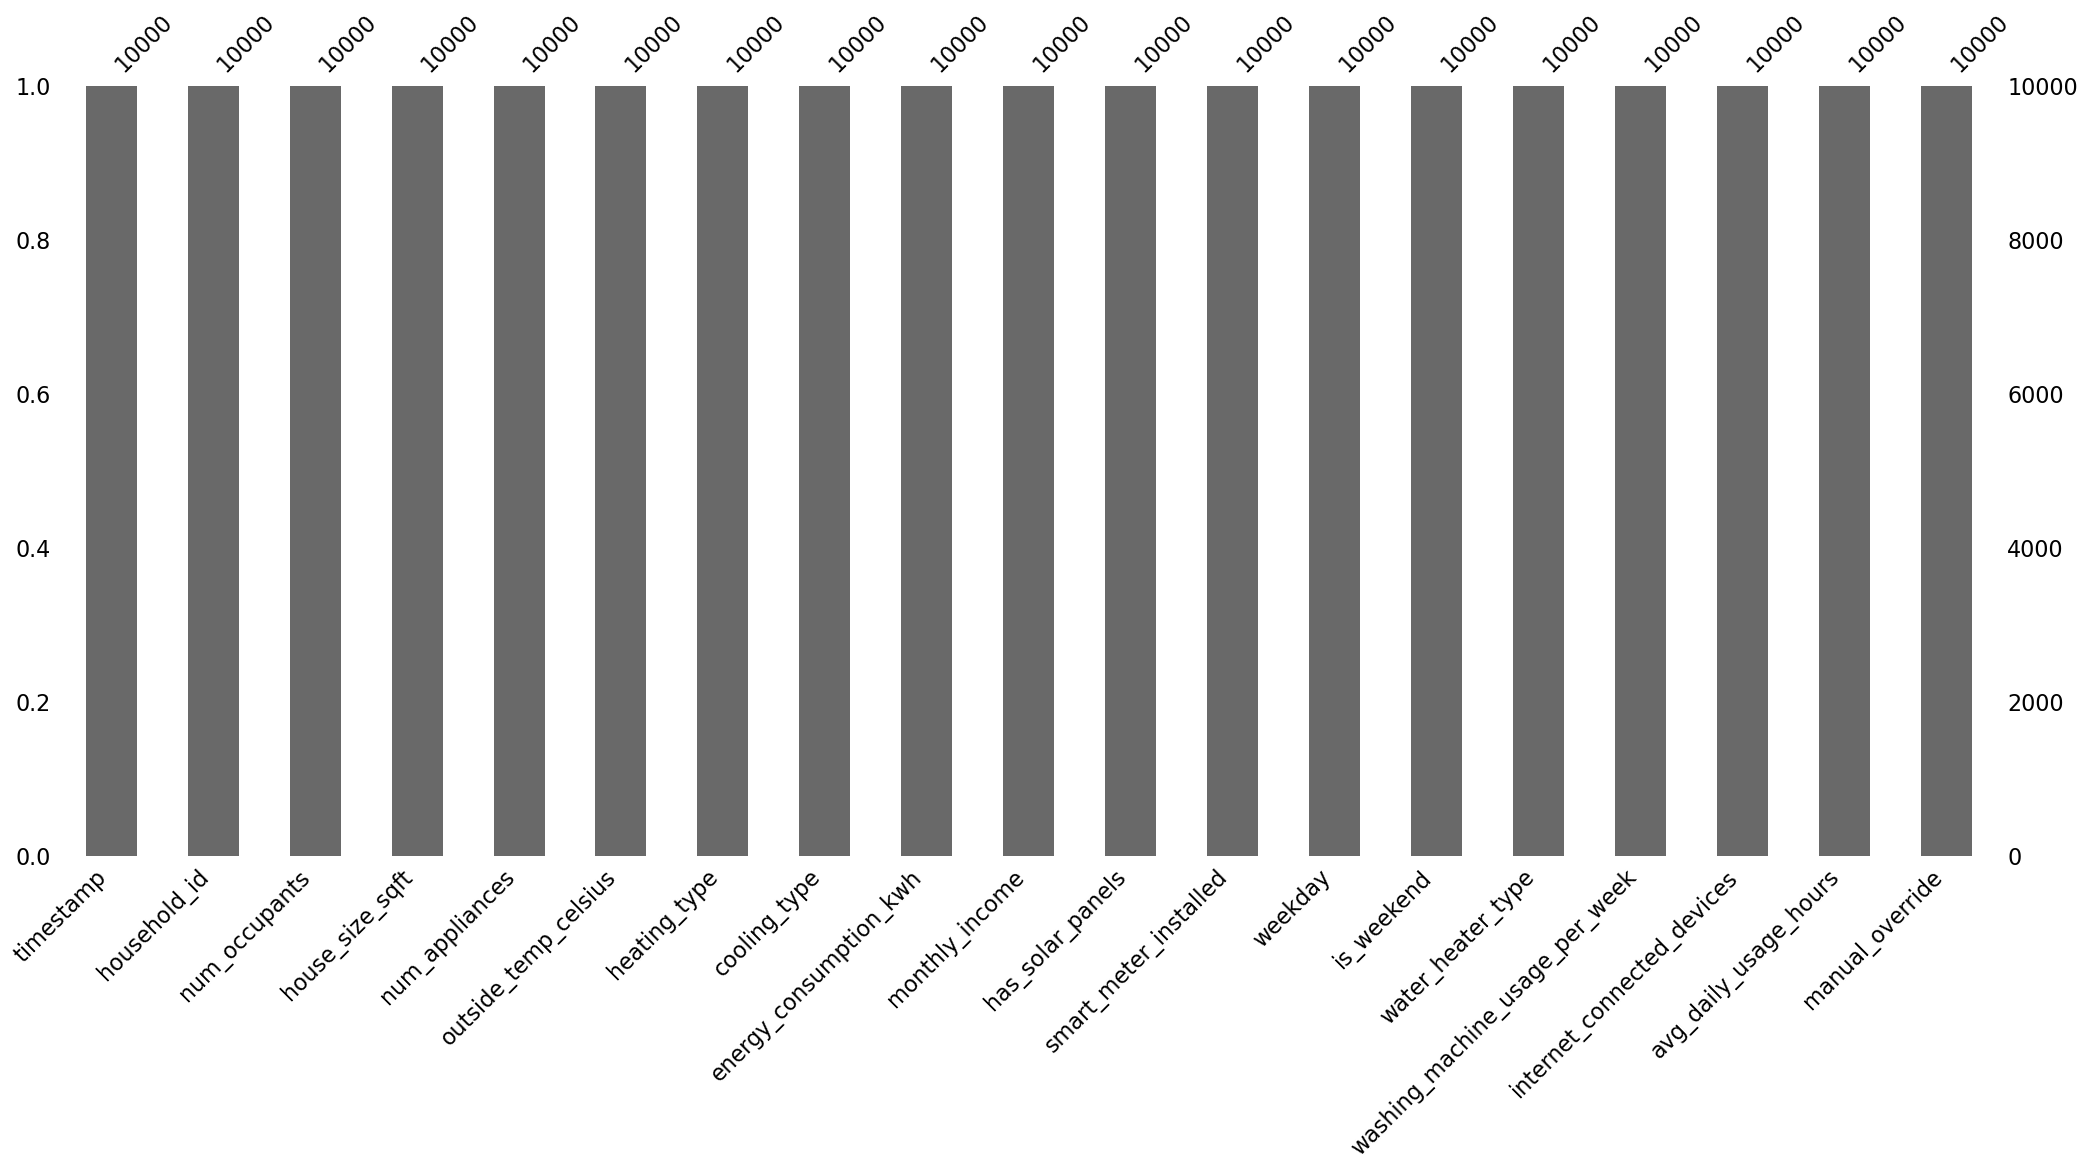

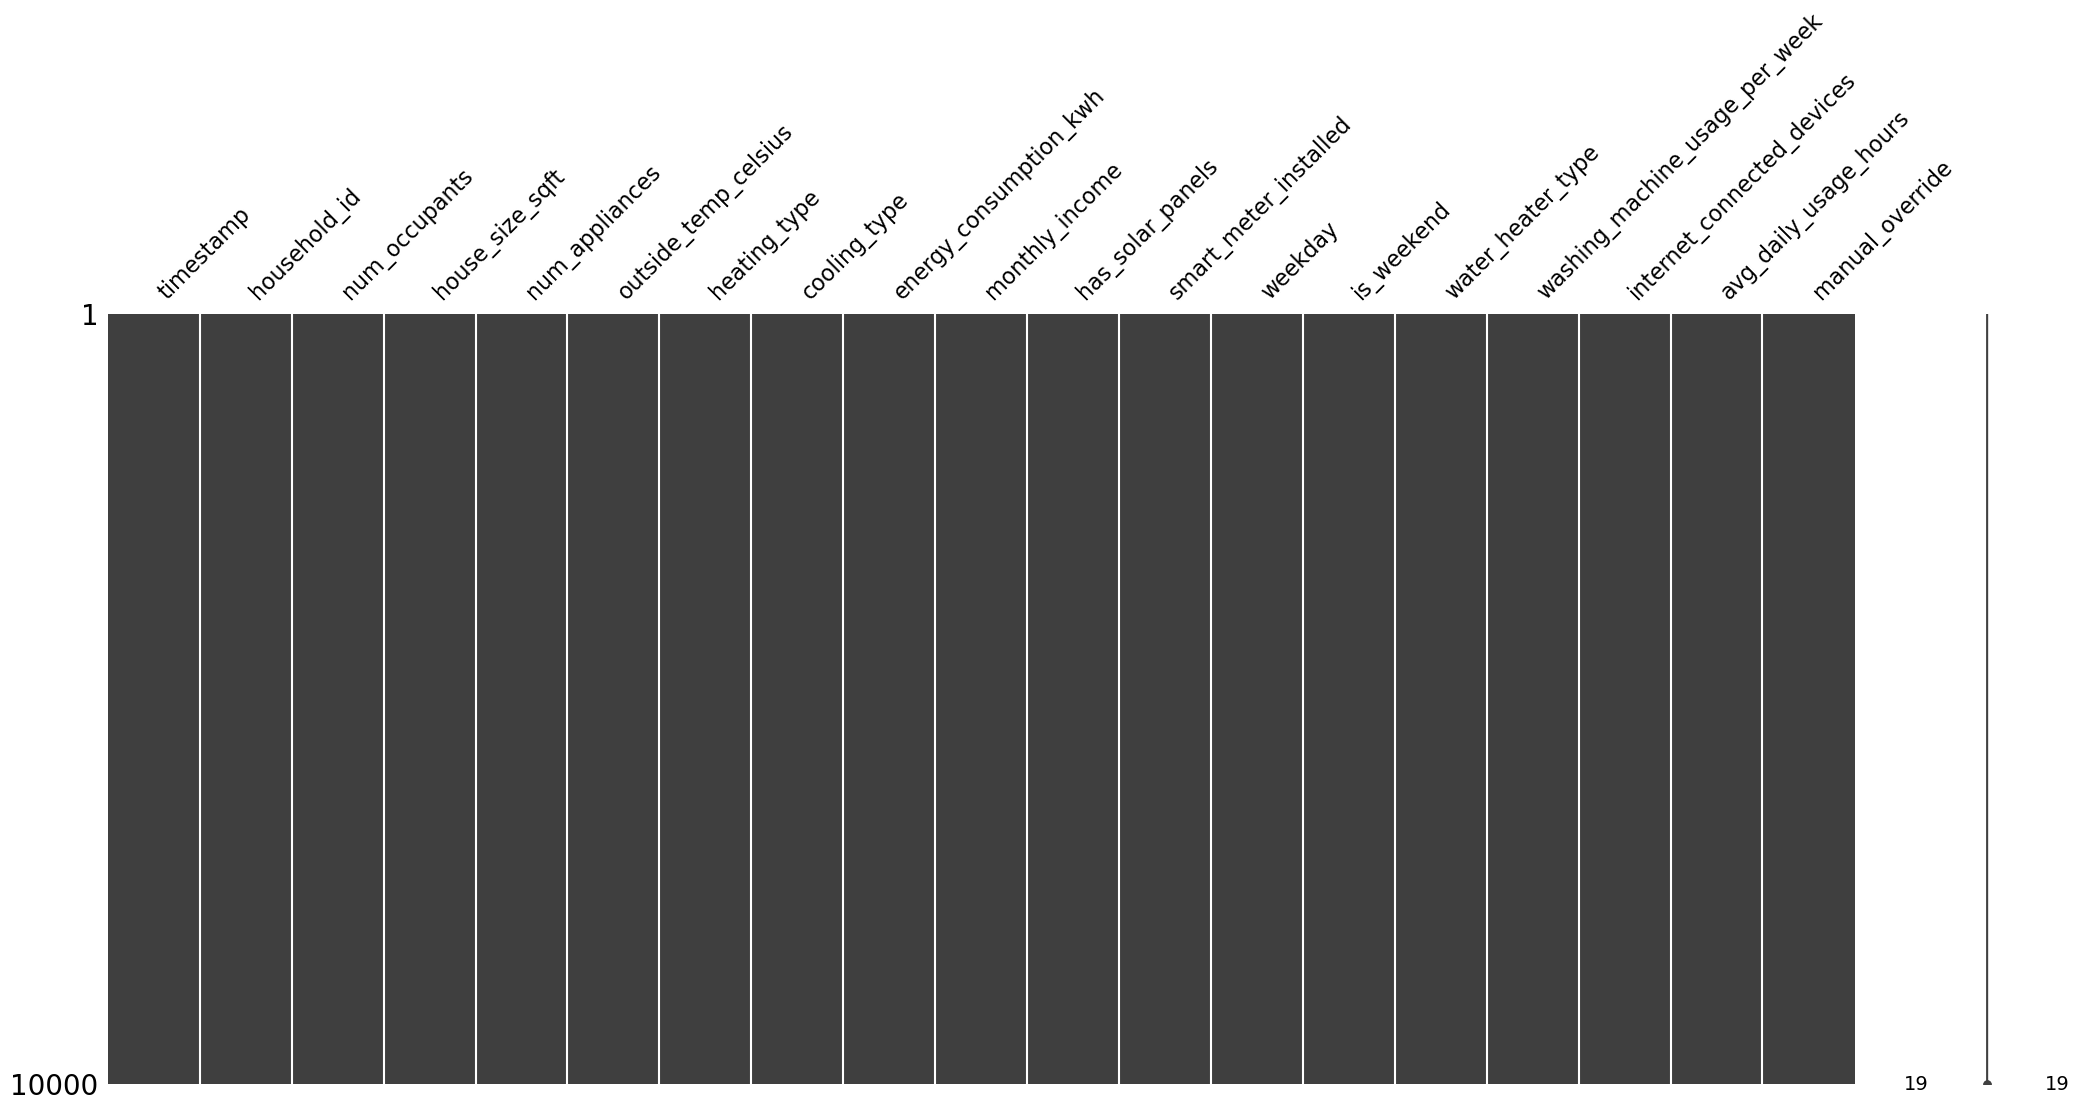

In [13]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()


In [14]:
null_values=df.isnull().sum()
print(f"null values : \n{null_values}")

null values : 
timestamp                         0
household_id                      0
num_occupants                     0
house_size_sqft                   0
num_appliances                    0
outside_temp_celsius              0
heating_type                      0
cooling_type                      0
energy_consumption_kwh            0
monthly_income                    0
has_solar_panels                  0
smart_meter_installed             0
weekday                           0
is_weekend                        0
water_heater_type                 0
washing_machine_usage_per_week    0
internet_connected_devices        0
avg_daily_usage_hours             0
manual_override                   0
dtype: int64


In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['timestamp', 'heating_type', 'cooling_type', 'weekday', 'water_heater_type', 'manual_override']


In [16]:
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    


Unique values in timestamp:
['2021-01-31' '30/12/2021' '2020-05-10' ... '08/01/2019' '19/08/2019'
 '17/04/2020']
Unique values in heating_type:
['Gas' 'Electrc' 'unknown']
Unique values in cooling_type:
['unknown' 'Fan' 'ac']
Unique values in weekday:
['Sunday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Friday' 'Saturday']
Unique values in water_heater_type:
['electric' 'gas' 'solar']
Unique values in manual_override:
['N' 'unknown' 'Y' 'Yes' 'No']


In [17]:
df['heating_type'] = df['heating_type'].str.strip().str.lower().replace('Electrc', 'Electric')
df['manual_override'] = df['manual_override'].str.strip().str.lower().replace('N', 'No')
df['manual_override'] = df['manual_override'].str.strip().str.lower().replace('Y', 'Yes')


In [18]:
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    


Unique values in timestamp:
['2021-01-31' '30/12/2021' '2020-05-10' ... '08/01/2019' '19/08/2019'
 '17/04/2020']
Unique values in heating_type:
['gas' 'electrc' 'unknown']
Unique values in cooling_type:
['unknown' 'Fan' 'ac']
Unique values in weekday:
['Sunday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Friday' 'Saturday']
Unique values in water_heater_type:
['electric' 'gas' 'solar']
Unique values in manual_override:
['n' 'unknown' 'y' 'yes' 'no']


In [19]:
df["timestamp"]=pd.to_datetime(df["timestamp"],errors='coerce',dayfirst=True)
print("Null values after converting:",df["timestamp"].isnull().sum())

Null values after converting: 997


C:\Users\linga\AppData\Local\Temp\ipykernel_9080\3377145162.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["timestamp"]=pd.to_datetime(df["timestamp"],errors='coerce',dayfirst=True)


In [20]:
print(df)

      timestamp  household_id  num_occupants  house_size_sqft  num_appliances  \
0    2021-01-31          1787            3.0           2922.0              16   
1           NaT          1263            4.0            571.0              24   
2    2020-05-10          1057            3.0            573.0              10   
3    2021-07-18          1301            3.0           2420.0               5   
4           NaT          1030            3.0           1864.0               7   
...         ...           ...            ...              ...             ...   
9995 2019-01-06          1963            5.0            663.0               5   
9996 2020-10-10          1582            5.0           2287.5              23   
9997        NaT          1648            4.0           2287.5              10   
9998 2022-01-11          1143            1.0           2525.0              15   
9999 2018-09-05          1388            2.0           2287.5              22   

      outside_temp_celsius 

In [21]:
df=df[df["timestamp"].notnull()]
print("Null values after converting:",df["timestamp"].isnull().sum())

Null values after converting: 0


In [22]:
#extract month
df["month"]=df["timestamp"].dt.month 
df["month"]

C:\Users\linga\AppData\Local\Temp\ipykernel_9080\2768931293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"]=df["timestamp"].dt.month


0        1
2        5
3        7
5       12
6        9
        ..
9994     7
9995     1
9996    10
9998     1
9999     9
Name: month, Length: 9003, dtype: int32

In [23]:
df["weekday"]=df["timestamp"].dt.weekday
df["weekday"]

C:\Users\linga\AppData\Local\Temp\ipykernel_9080\880868844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday"]=df["timestamp"].dt.weekday


0       6
2       6
3       6
5       3
6       2
       ..
9994    3
9995    6
9996    5
9998    1
9999    2
Name: weekday, Length: 9003, dtype: int32

In [24]:
df.drop(columns=["timestamp"],inplace=True)

C:\Users\linga\AppData\Local\Temp\ipykernel_9080\1317437082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["timestamp"],inplace=True)


In [25]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['heating_type', 'cooling_type', 'water_heater_type', 'manual_override']


In [26]:
df_encoded=pd.get_dummies(df,categorical_cols, drop_first=True)
df_encoded

,household_id,num_occupants,house_size_sqft,num_appliances,outside_temp_celsius,energy_consumption_kwh,monthly_income,has_solar_panels,smart_meter_installed,weekday,...,heating_type_gas,heating_type_unknown,cooling_type_ac,cooling_type_unknown,water_heater_type_gas,water_heater_type_solar,manual_override_no,manual_override_unknown,manual_override_y,manual_override_yes
0,1787,3.0,2922.0,16,14.997244,22.73,163860.0,0,1,6,...,True,False,False,True,False,False,False,False,False,False
2,1057,3.0,573.0,10,3.700000,57.88,192595.0,1,1,6,...,False,False,False,False,True,False,False,True,False,False
3,1301,3.0,2420.0,5,4.600000,17.64,109937.0,1,1,6,...,False,False,False,True,True,False,False,True,False,False
5,1497,1.0,2700.0,11,18.000000,32.97,154381.0,0,1,3,...,False,False,True,False,False,True,False,True,False,False
6,1248,3.0,2643.0,15,10.300000,-3.99,57891.0,0,1,2,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1288,1.0,1404.0,5,20.800000,24.64,34590.0,0,0,3,...,True,False,True,False,True,False,True,False,False,False
9995,1963,5.0,663.0,5,-0.900000,29.63,109937.0,1,1,6,...,False,True,False,True,False,True,False,True,False,False
9996,1582,5.0,2287.5,23,0.600000,34.29,165021.0,0,1,5,...,False,True,False,True,False,False,False,False,False,False
9998,1143,1.0,2525.0,15,16.800000,3.17,173460.0,0,1,1,...,False,True,False,False,False,True,False,False,False,True


In [27]:
target="energy_consumption_kwh"
x=df_encoded.drop(columns=[target])
y=df_encoded[target]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb

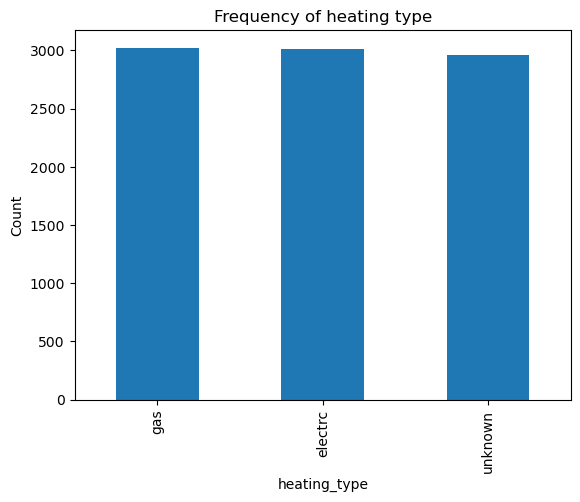

In [29]:
df["heating_type"].value_counts().plot(kind="bar")
plt.title("Frequency of heating type")
plt.xlabel("heating_type")
plt.ylabel("Count")
plt.show()

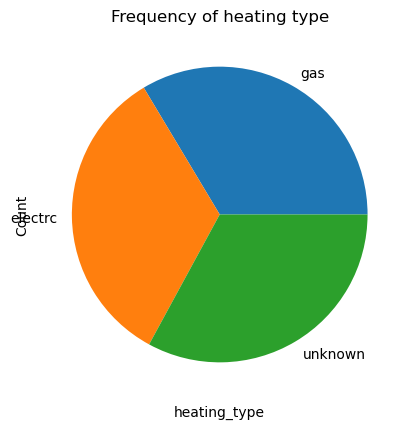

In [30]:
df["heating_type"].value_counts().plot(kind="pie")
plt.title("Frequency of heating type")
plt.xlabel("heating_type")
plt.ylabel("Count")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(
    x,y,test_size=0.2, random_state=42
)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

x_test_scaled=scaler.transform(x_test)
x_test_scaled

array([[-1.07422967, -0.26711157, -0.98197461, ..., -0.70210534,
         2.20671717, -0.44378148],
       [-0.24571007,  1.57554891,  0.00721495, ...,  1.4242877 ,
        -0.45316183, -0.44378148],
       [-0.4701008 ,  1.57554891,  1.41831879, ..., -0.70210534,
        -0.45316183, -0.44378148],
       ...,
       [ 0.21342787, -0.26711157, -1.34826337, ..., -0.70210534,
         2.20671717, -0.44378148],
       [-0.32510987, -0.88133173, -1.34406522, ...,  1.4242877 ,
        -0.45316183, -0.44378148],
       [-0.51497894, -0.26711157,  0.00721495, ...,  1.4242877 ,
        -0.45316183, -0.44378148]])

In [33]:
import numpy as np
print("Mean (train) :",np.round(x_train_scaled.mean(axis=0),2))
print(" STD (train) :",np.round(x_train_scaled.mean(axis=0),2))


Mean (train) : [ 0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0.]
 STD (train) : [ 0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0.]


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
y_pred = lin_reg.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", round(mse, 2))
print("Root Mean Squared Error :", round(rmse, 2))
print("R² Score :", round(r2, 2))


Mean Squared Error : 225.94
Root Mean Squared Error : 15.03
R² Score : -0.0


In [35]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
dummy=DummyRegressor(strategy="mean")
dummy.fit(x_train,y_train)
baseline_pred=dummy.predict(x_test)
print("Baseline RMSE", mean_squared_error(y_test,baseline_pred))
print("Baseline R2:", r2_score(y_test,baseline_pred))

Baseline RMSE 226.26358327806489
Baseline R2: -0.0020235215777033577


In [36]:
import joblib



In [ ]:
#list a number of features(inputs)
def prediction_energy():
    sqft=float(input("sqft : "))
    income=float(input("Income : "))
    occupience=int(input("Occupience : "))
    temp=int(input("Temperature : "))
    day=int(input("Day : "))
    month=int(input("Month : "))
    coolingtype=input("Coolingtype : ").lower().strip()
    heatingtype=input("Heatingtype : ").lower().strip()
    manual=input("manual : ").lower().strip()
    weekend=1 if day in[5, 6] else 0
    input_dict= {
        "house_size_sqft":sqft,
        "monthly_income":income,
        "num_occupience":occupience,
        "outside_temp_celsius":temp,
        "month":month,
        "day_of_week":day,
        f"heating_type_{heatingtype}" :1,
        f"cooling_type_{coolingtype}":1,
        f"manual_override_{manual}":1,
    }

    df=pd.DataFrame([input_dict])
    for col in x_train.columns:
        if col not in df.columns:
            df[col]=0

    df=df[x_train.columnsmode]
    pred=lin_reg.predict(df)[0]
    print(f"prediction: {pred:.2f}")

prediction_energy()